In [231]:
%run './OMC_scan_funs.py'
%run './OMC_scan_funs_no_pandas.py'

In [146]:
import numpy as np
import csv

In [147]:
# %%time
# dc = {}
# from numpy import genfromtxt
# my_data = genfromtxt('./hoak_omc.csv', dtype=float, delimiter=' ')
# dc['time'] = my_data[:,0]
# dc['omc'] = my_data[:,1]

# my_data2 = genfromtxt('./hoak_pzt.csv', dtype=float, delimiter=' ')

# dc['pzt'] = my_data2[:,1]

CPU times: user 1.25 s, sys: 219 ms, total: 1.47 s
Wall time: 1.58 s


In [149]:
# %%time
# dc2 = {}
# data =[]
# with open('./hoak_omc.csv', 'r') as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     data = list(csvreader)
    
# data = np.array(data).astype(float)
# dc2['time'] = data[:,0]
# dc2['omc'] = data[:,1]

# data =[]
# with open('./hoak_pzt.csv', 'r') as csvfile:
#     csvreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     data = list(csvreader)

# data = np.array(data).astype(float)
# dc2['pzt'] = data[:,1]

In [150]:
# %%time
# df = parse_OMC_scan_data('./hoak_omc.csv','./hoak_pzt.csv',verbose=False)

In [151]:
dc = parse_OMC_scan_data2('./hoak_omc.csv','./hoak_pzt.csv',verbose=False)

In [152]:
keep_range=[0,1]

min_pzt = np.min(dc['pzt'])
max_pzt = np.max(dc['pzt'])
range_pzt = max_pzt - min_pzt

In [153]:
dc['pzt'][(dc['pzt'] > min_pzt+range_pzt*keep_range[0]) & (dc['pzt'] < min_pzt+range_pzt*keep_range[1])]

array([36.677399, 36.679958, 36.682518, ..., 36.669724, 36.672283,
       36.674839])

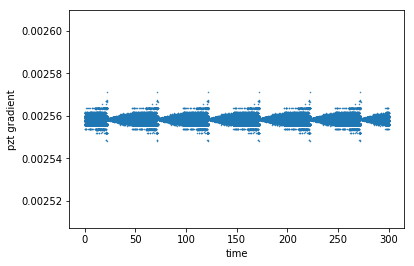

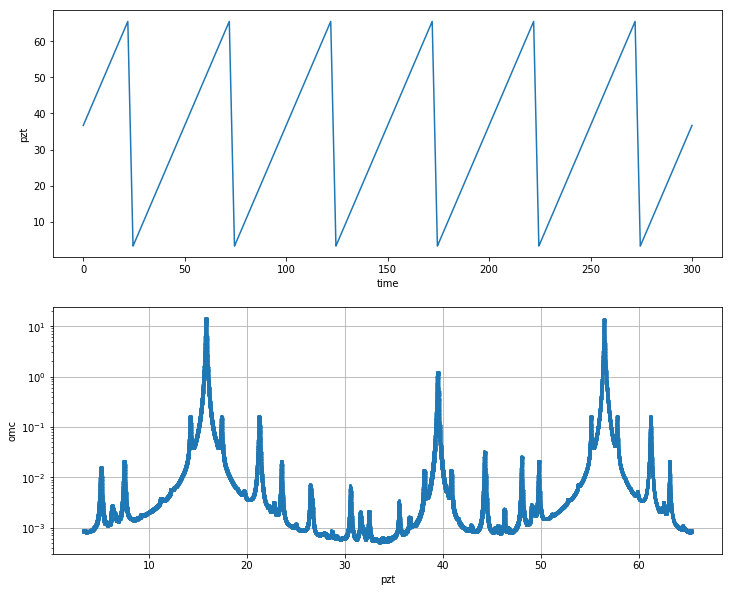

In [173]:
dc3 = initial_clean(dc,gradient_tolerance=0.01,keep_range=[0.05,1])

In [170]:
# fig = plt.figure(figsize=[12,10])

# plt.subplot(2, 1, 1)
# plt.plot(dc3['time'],dc3['pzt'])
# plt.xlabel('time')
# plt.ylabel('pzt')
# plt.subplot(2, 1, 2)
# plt.semilogy(dc3['pzt'],dc3['omc'],'.',markersize=2)
# plt.xlabel('pzt')
# plt.ylabel('omc')
# plt.grid()
# plt.show()

In [225]:
%run './OMC_scan_funs_no_pandas.py'
digitized_pzt = digitize_output(dc3)

In [211]:
result = {}
keys = digitized_pzt
vals = dc2['omc']
for key, val in zip(keys, vals):
    if key not in result:
        result[key] = []
    result[key].append(val)

res2 = []
for key in result:
    res2.append(np.mean(result[key]))

dc6 = {}
sort_ind = np.argsort(dn2[:,0])
dc6['pzt'] = dn2[sort_ind,0]
dc6['omc'] = dn2[sort_ind,1]

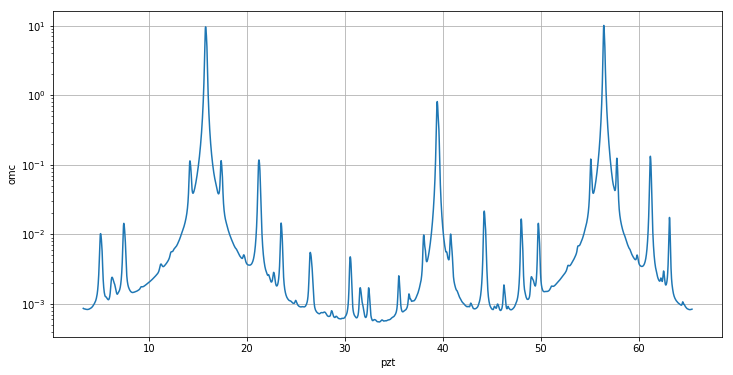

In [224]:
fig = plt.figure(figsize=[12,6])

plt.semilogy(digitized_pzt['pzt'],digitized_pzt['omc'])
plt.xlabel('pzt')
plt.ylabel('omc')
plt.grid()
plt.show()

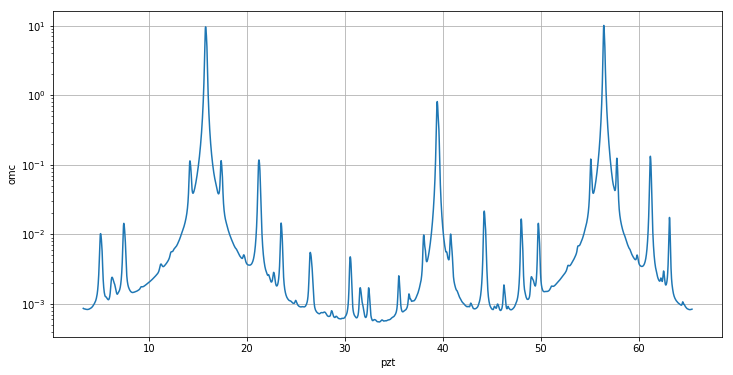

In [219]:
fig = plt.figure(figsize=[12,6])

plt.semilogy(dc6['pzt'],dc6['omc'])
plt.xlabel('pzt')
plt.ylabel('omc')
plt.grid()
plt.show()

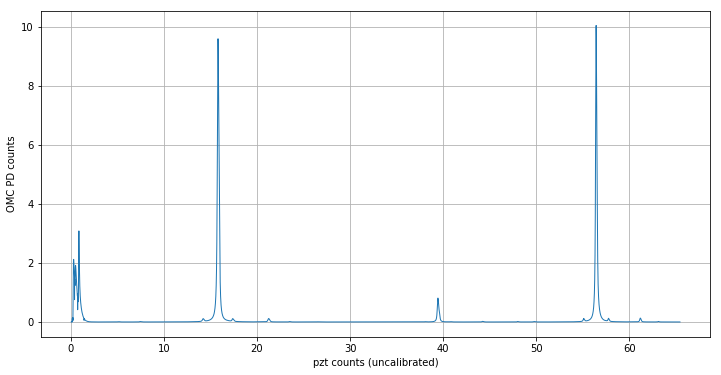

({'omc': array([0.00083786, 0.00084064, 0.00084508, ..., 0.00084242, 0.00084227,
         0.00084282]),
  'pzt': array([3.47381959e-02, 3.73036147e-02, 3.98690336e-02, ...,
         6.54580502e+01, 6.54606156e+01, 6.54631810e+01])},
 <Figure size 864x432 with 1 Axes>)

In [250]:
%run './OMC_scan_funs_no_pandas.py'
just_do_it('./hoak_omc.csv','./hoak_pzt.csv')

In [239]:
for value in dc6.items():
    print(value)

('pzt', array([ 3.31826589,  3.32082958,  3.32339327, ..., 65.44417562,
       65.44673931, 65.449303  ]))
('omc', array([0.00086481, 0.00086393, 0.00086323, ..., 0.00084132, 0.00084138,
       0.00084168]))


In [246]:
list(dc6.keys())

['pzt', 'omc']

In [241]:
list(zip(dc6['pzt'],dc6['omc']))

[(3.3182658904109594, 0.0008648119300000001),
 (3.3208295808219184, 0.00086393218),
 (3.3233932712328773, 0.0008632275566666666),
 (3.3259569616438363, 0.0008627434433333333),
 (3.328520652054795, 0.0008620783733333334),
 (3.331084342465754, 0.0008615093233333335),
 (3.3336480328767126, 0.0008607698333333334),
 (3.3362117232876716, 0.0008603049316666667),
 (3.3387754136986305, 0.0008598223516666667),
 (3.3413391041095895, 0.000859291535),
 (3.3439027945205484, 0.0008587908133333333),
 (3.3464664849315073, 0.0008584145499999999),
 (3.3490301753424663, 0.0008579708816666666),
 (3.351593865753425, 0.0008573698266666666),
 (3.354157556164384, 0.0008569573016666667),
 (3.356721246575343, 0.0008562154849999999),
 (3.359284936986302, 0.000855771135),
 (3.361848627397261, 0.0008554456983333334),
 (3.3644123178082195, 0.00085494385),
 (3.3669760082191784, 0.0008543599599999999),
 (3.3695396986301374, 0.0008540335016666666),
 (3.3721033890410963, 0.0008535756333333332),
 (3.3746670794520552, 0.0

In [236]:
dc6.items()

dict_items([('pzt', array([ 3.31826589,  3.32082958,  3.32339327, ..., 65.44417562,
       65.44673931, 65.449303  ])), ('omc', array([0.00086481, 0.00086393, 0.00086323, ..., 0.00084132, 0.00084138,
       0.00084168]))])